In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

import warnings
warnings.filterwarnings('ignore')

In [286]:
df=pd.read_csv('realestate.csv')
df.head(5)

,title,country,location,building_construction_year,building_total_floors,apartment_floor,apartment_rooms,apartment_bedrooms,apartment_bathrooms,apartment_total_area,apartment_living_area,price_in_USD,image,url
0,2 room apartment 120 m² in Mediterranean Regio...,Turkey,"Mediterranean Region, Turkey",NaN,5.0,1.0,3.0,2.0,2.0,120 m²,110 m²,315209.0,https://realting.com/uploads/bigSlider/ab3/888...,https://realting.com/property-for-sale/turkey/...
1,"4 room villa 500 m² in Kalkan, Turkey",Turkey,"Kalkan, Mediterranean Region, Kas, Turkey",2021.0,2.0,NaN,NaN,NaN,NaN,500 m²,480 m²,1108667.0,https://realting.com/uploads/bigSlider/87b/679...,https://realting.com/property-for-sale/turkey/...
2,"1 room apartment 65 m² in Antalya, Turkey",Turkey,"Mediterranean Region, Antalya, Turkey",NaN,5.0,2.0,2.0,1.0,1.0,65 m²,60 m²,173211.0,https://realting.com/uploads/bigSlider/030/a11...,https://realting.com/property-for-sale/turkey/...
3,"1 room apartment in Pattaya, Thailand",Thailand,"Chon Buri Province, Pattaya, Thailand",2020.0,15.0,5.0,2.0,1.0,1.0,NaN,40 m²,99900.0,https://realting.com/uploads/bigSlider/e9a/e06...,https://realting.com/property-for-sale/thailan...
4,"2 room apartment in Pattaya, Thailand",Thailand,"Chon Buri Province, Pattaya, Thailand",2026.0,8.0,3.0,3.0,2.0,1.0,NaN,36 m²,67000.0,https://realting.com/uploads/bigSlider/453/aa2...,https://realting.com/property-for-sale/thailan...


In [6]:
df.shape

(147536, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147536 entries, 0 to 147535
Data columns (total 14 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   title                       147536 non-null  object 
 1   country                     147406 non-null  object 
 2   location                    147405 non-null  object 
 3   building_construction_year  64719 non-null   float64
 4   building_total_floors       68224 non-null   float64
 5   apartment_floor             54592 non-null   float64
 6   apartment_rooms             74178 non-null   float64
 7   apartment_bedrooms          36982 non-null   float64
 8   apartment_bathrooms         55973 non-null   float64
 9   apartment_total_area        141796 non-null  object 
 10  apartment_living_area       27712 non-null   object 
 11  price_in_USD                144961 non-null  float64
 12  image                       147536 non-null  object 
 13  url           

In [ ]:
# check the null values.
df.isna().sum()

title                              0
country                          130
location                         131
building_construction_year         0
building_total_floors          77376
apartment_floor                90832
apartment_rooms                71350
apartment_bedrooms            108397
apartment_bathrooms            89173
apartment_total_area            4706
apartment_living_area         117769
price_in_USD                       0
image                              0
url                                0
Country                            0
dtype: int64

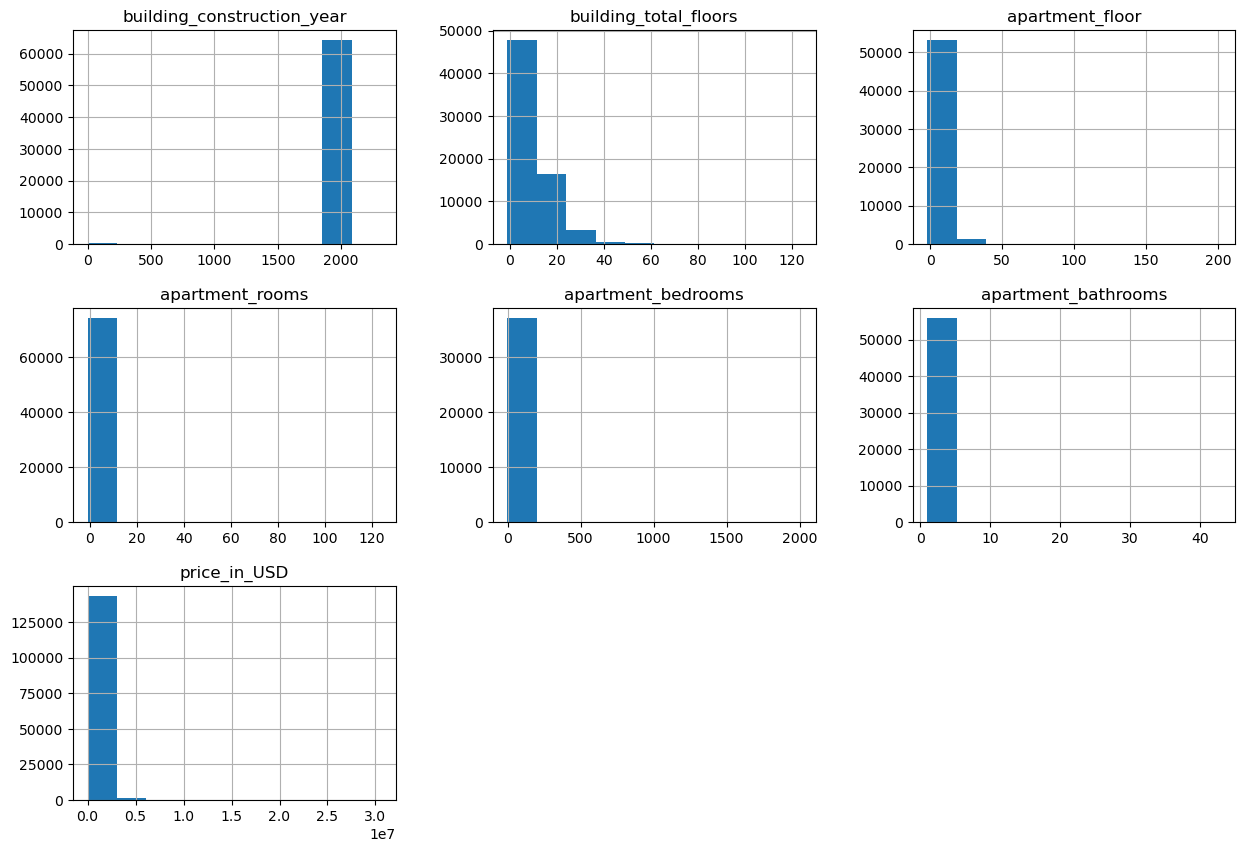

In [ ]:
#plot a graph,that dataset is linear or mom-linear
df.select_dtypes(include="number").hist(figsize=(15, 10))
plt.show()


In [ ]:
#droping the null values in the target column
df.dropna(subset=['price_in_USD'],inplace=True)

In [10]:
df['Country']= df['title'].str.extract(r'\,\s(.+$)')

In [11]:
df['Country'].isna().sum()

0

In [12]:
df['building_construction_year']=df['building_construction_year'].fillna(df['building_construction_year'].median())

In [14]:
df['Total_area(m²)']= df['title'].str.extract(r'.\s(\d+)\sm²\s')

In [15]:
df['Total_area(m²)'] = pd.to_numeric(df['Total_area(m²)'], errors='coerce')

In [16]:
df['apartment_floor']=df['title'].str.extract(r'^(\d)').replace(np.nan,0).astype('int')

In [17]:
df['apartment_floors']=df['title'].str.extract(r'\s(\d)\s').replace(np.nan,0).astype('int')

In [18]:
df['apartment']=df['apartment_floor']+df['apartment_floors']

In [19]:
df['apartment'][df['apartment'] == 0].sum()

0

In [20]:
df['apartment'].isna().sum()

0

In [21]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

In [ ]:
#using knn imputer to fill the null values
knn_imputer = KNNImputer(n_neighbors=3,weights='distance')
df[['Total_area(m²)','price_in_USD','building_total_floors']]=knn_imputer.fit_transform(df[['Total_area(m²)','price_in_USD','building_total_floors']])

In [23]:
knn_imputer = KNNImputer(n_neighbors=3,weights='distance')
df[['building_total_floors','price_in_USD','apartment_rooms']]=knn_imputer.fit_transform(df[['building_total_floors','price_in_USD','apartment_rooms']])

In [24]:
knn_imputer = KNNImputer(n_neighbors=3,weights='distance')
df[['apartment_rooms','price_in_USD','apartment_bedrooms']]=knn_imputer.fit_transform(df[['apartment_rooms','price_in_USD','apartment_bedrooms']])

In [25]:
knn_imputer = KNNImputer(n_neighbors=3,weights='distance')
df[['apartment_rooms','apartment_bedrooms','apartment_bathrooms']]=knn_imputer.fit_transform(df[['apartment_rooms','apartment_bedrooms','apartment_bathrooms']])

In [26]:
df['title'].iloc[35]

'2 room apartment 89 m² in Budva, Montenegro'

In [27]:
df['Country'].iloc[35]

'Montenegro'

In [28]:
df['Location']= df['title'].str.extract(r'.+\s(.+\s.+)$')

In [29]:
df['Location'].isna().sum()

0

In [44]:
df.isna().sum()

title                           0
building_construction_year      0
total floors in the building    0
n.of houses                     0
apartment_bedrooms              0
apartment_bathrooms             0
price_in_USD                    0
Country                         0
Total_area(m²)                  0
n.of apartment                  0
Location                        0
dtype: int64

In [ ]:
#droping the unwanted clomuns in the dataset which are not necessary for precdiction
df.drop(columns=['country','location','apartment_floor','apartment_floors','image','url','apartment_living_area'],inplace=True)

In [34]:
df.drop(columns=['apartment_total_area'],inplace=True)

In [39]:
df.rename(columns={'apartment_rooms':'n.of houses'},inplace=True)

In [41]:
df.rename(columns={'apartment':'n.of apartment'},inplace=True)

In [43]:
df.rename(columns={'building_total_floors':'total floors in the building'},inplace=True)

In [42]:
df['building_total_floors'].unique()

array([ 5.        ,  2.        , 15.        , ...,  1.89361702,
       10.15844903,  5.67484397])

In [45]:
df.head()

,title,building_construction_year,total floors in the building,n.of houses,apartment_bedrooms,apartment_bathrooms,price_in_USD,Country,Total_area(m²),n.of apartment,Location
0,2 room apartment 120 m² in Mediterranean Regio...,2021.0,5.0,3.000000,2.000000,2.000000,315209.0,Turkey,120.0,2,"Region, Turkey"
1,"4 room villa 500 m² in Kalkan, Turkey",2021.0,2.0,4.666667,3.333333,1.298567,1108667.0,Turkey,500.0,4,"Kalkan, Turkey"
2,"1 room apartment 65 m² in Antalya, Turkey",2021.0,5.0,2.000000,1.000000,1.000000,173211.0,Turkey,65.0,1,"Antalya, Turkey"
3,"1 room apartment in Pattaya, Thailand",2020.0,15.0,2.000000,1.000000,1.000000,99900.0,Thailand,103.0,1,"Pattaya, Thailand"
4,"2 room apartment in Pattaya, Thailand",2026.0,8.0,3.000000,2.000000,1.000000,67000.0,Thailand,155.0,2,"Pattaya, Thailand"


In [46]:
df.to_csv('real_estate_final.csv',index=False)

In [123]:

import pandas as pd
df=pd.read_csv('real_estate_final.csv')
df.head()

,title,building_construction_year,total floors in the building,n.of houses,apartment_bedrooms,apartment_bathrooms,price_in_USD,Country,Total_area(m²),n.of apartment,Location
0,2 room apartment 120 m² in Mediterranean Regio...,2021.0,5.0,3.000000,2.000000,2.000000,315209.0,Turkey,120.0,2,"Region, Turkey"
1,"4 room villa 500 m² in Kalkan, Turkey",2021.0,2.0,4.666667,3.333333,1.298567,1108667.0,Turkey,500.0,4,"Kalkan, Turkey"
2,"1 room apartment 65 m² in Antalya, Turkey",2021.0,5.0,2.000000,1.000000,1.000000,173211.0,Turkey,65.0,1,"Antalya, Turkey"
3,"1 room apartment in Pattaya, Thailand",2020.0,15.0,2.000000,1.000000,1.000000,99900.0,Thailand,103.0,1,"Pattaya, Thailand"
4,"2 room apartment in Pattaya, Thailand",2026.0,8.0,3.000000,2.000000,1.000000,67000.0,Thailand,155.0,2,"Pattaya, Thailand"


In [124]:
df.drop(columns=['title'],inplace=True)

In [125]:
df[['total floors in the building','building_construction_year','apartment_bedrooms','apartment_bathrooms','price_in_USD','Total_area(m²)','n.of apartment','n.of houses']]=df[['total floors in the building','building_construction_year','apartment_bedrooms','apartment_bathrooms','price_in_USD','Total_area(m²)','n.of apartment','n.of houses']].astype(int)

In [126]:
df.head()

,building_construction_year,total floors in the building,n.of houses,apartment_bedrooms,apartment_bathrooms,price_in_USD,Country,Total_area(m²),n.of apartment,Location
0,2021,5,3,2,2,315209,Turkey,120,2,"Region, Turkey"
1,2021,2,4,3,1,1108667,Turkey,500,4,"Kalkan, Turkey"
2,2021,5,2,1,1,173211,Turkey,65,1,"Antalya, Turkey"
3,2020,15,2,1,1,99900,Thailand,103,1,"Pattaya, Thailand"
4,2026,8,3,2,1,67000,Thailand,155,2,"Pattaya, Thailand"


In [127]:
df['Country'].unique()

array(['Turkey', 'Thailand', 'Georgia', 'Montenegro', 'Northern Cyprus',
       'Lithuania', 'Belarus', 'UAE', 'Czech Republic', 'Uzbekistan',
       'Greece', 'Serbia', 'Italy', 'Hungary',
       'West Greece and Ionian Sea, Greece', 'Russia', 'Finland',
       'Poland', 'Austria', 'Spain', 'Latvia', 'Portugal', 'Armenia',
       'Croatia', 'Australia', 'Indonesia'], dtype=object)

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144961 entries, 0 to 144960
Data columns (total 10 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   building_construction_year    144961 non-null  int32 
 1   total floors in the building  144961 non-null  int32 
 2   n.of houses                   144961 non-null  int32 
 3   apartment_bedrooms            144961 non-null  int32 
 4   apartment_bathrooms           144961 non-null  int32 
 5   price_in_USD                  144961 non-null  int32 
 6   Country                       144961 non-null  object
 7   Total_area(m²)                144961 non-null  int32 
 8   n.of apartment                144961 non-null  int32 
 9   Location                      144961 non-null  object
dtypes: int32(8), object(2)
memory usage: 6.6+ MB


In [129]:
df['Locality']=df['Location'].str.extract(r'(.+),\s')

In [130]:
df['Locality'].isna().sum()

2195

In [131]:
df=df.dropna()

In [132]:
df.isna().sum()

building_construction_year      0
total floors in the building    0
n.of houses                     0
apartment_bedrooms              0
apartment_bathrooms             0
price_in_USD                    0
Country                         0
Total_area(m²)                  0
n.of apartment                  0
Location                        0
Locality                        0
dtype: int64

In [100]:
df.shape

(142766, 11)

In [133]:
df.drop(columns=['Location'],inplace=True)

In [134]:
df.head()

,building_construction_year,total floors in the building,n.of houses,apartment_bedrooms,apartment_bathrooms,price_in_USD,Country,Total_area(m²),n.of apartment,Locality
0,2021,5,3,2,2,315209,Turkey,120,2,Region
1,2021,2,4,3,1,1108667,Turkey,500,4,Kalkan
2,2021,5,2,1,1,173211,Turkey,65,1,Antalya
3,2020,15,2,1,1,99900,Thailand,103,1,Pattaya
4,2026,8,3,2,1,67000,Thailand,155,2,Pattaya


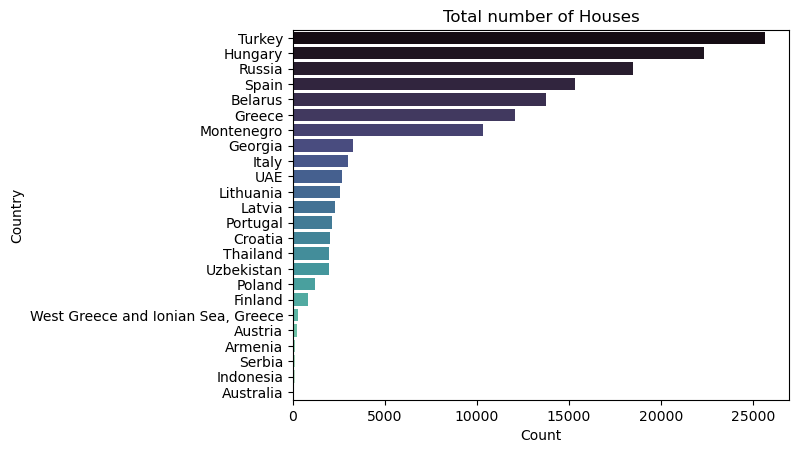

In [ ]:
# ploting a graph for 'Total number of Houses'
sns.countplot(data=df, y='Country', order=df['Country'].value_counts().index, palette='mako')
plt.title('Total number of Houses')
plt.xlabel('Count')
plt.ylabel('Country') 
plt.show()

In [103]:
# labelEncoder the categorical features
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()


df["locality_en"]=encoder.fit_transform(df[["Locality"]])
df["Country_en"]=encoder.fit_transform(df[["Country"]])

In [104]:
df.head()

,building_construction_year,total floors in the building,n.of houses,apartment_bedrooms,apartment_bathrooms,price_in_USD,Country,Total_area(m²),n.of apartment,Locality,locality_en,Country_en
0,2021,5,3,2,2,315209,Turkey,120,2,Region,4162,20
1,2021,2,4,3,1,1108667,Turkey,500,4,Kalkan,2025,20
2,2021,5,2,1,1,173211,Turkey,65,1,Antalya,215,20
3,2020,15,2,1,1,99900,Thailand,103,1,Pattaya,3685,19
4,2026,8,3,2,1,67000,Thailand,155,2,Pattaya,3685,19


In [105]:
df.drop(columns=['Country','Locality'],inplace=True)

In [106]:
df.head()

,building_construction_year,total floors in the building,n.of houses,apartment_bedrooms,apartment_bathrooms,price_in_USD,Total_area(m²),n.of apartment,locality_en,Country_en
0,2021,5,3,2,2,315209,120,2,4162,20
1,2021,2,4,3,1,1108667,500,4,2025,20
2,2021,5,2,1,1,173211,65,1,215,20
3,2020,15,2,1,1,99900,103,1,3685,19
4,2026,8,3,2,1,67000,155,2,3685,19


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142766 entries, 0 to 144960
Data columns (total 10 columns):
 #   Column                        Non-Null Count   Dtype
---  ------                        --------------   -----
 0   building_construction_year    142766 non-null  int32
 1   total floors in the building  142766 non-null  int32
 2   n.of houses                   142766 non-null  int32
 3   apartment_bedrooms            142766 non-null  int32
 4   apartment_bathrooms           142766 non-null  int32
 5   price_in_USD                  142766 non-null  int32
 6   Total_area(m²)                142766 non-null  int32
 7   n.of apartment                142766 non-null  int32
 8   locality_en                   142766 non-null  int32
 9   Country_en                    142766 non-null  int32
dtypes: int32(10)
memory usage: 6.5 MB


In [107]:
df.to_csv('real_estate_finals.csv',index=False)

In [31]:
import pandas as pd
import numpy as np

df=pd.read_csv('real_estate_finals.csv')
df.head(3)

,building_construction_year,total floors in the building,n.of houses,apartment_bedrooms,apartment_bathrooms,price_in_USD,Total_area(m²),n.of apartment,locality_en,Country_en
0,2021,5,3,2,2,315209,120,2,4162,20
1,2021,2,4,3,1,1108667,500,4,2025,20
2,2021,5,2,1,1,173211,65,1,215,20


In [32]:
df.describe()

,building_construction_year,total floors in the building,n.of houses,apartment_bedrooms,apartment_bathrooms,price_in_USD,Total_area(m²),n.of apartment,locality_en,Country_en
count,142766.000000,142766.000000,142766.000000,142766.000000,142766.000000,1.427660e+05,142766.000000,142766.000000,142766.000000,142766.000000
mean,2010.117920,7.866985,2.660073,1.859175,1.310130,4.147791e+05,129.888559,2.508573,2706.604416,12.868729
std,106.724744,7.522535,1.321627,10.184353,0.762868,8.479900e+05,120.947447,1.643188,1808.367593,5.967161
min,1.000000,-1.000000,-1.000000,-1.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,2021.000000,2.000000,2.000000,1.000000,1.000000,1.051518e+05,58.000000,1.000000,856.000000,8.000000
50%,2021.000000,5.000000,3.000000,2.000000,1.000000,1.902120e+05,90.000000,2.000000,2867.000000,13.000000
75%,2021.000000,12.000000,3.000000,2.000000,1.000000,4.010760e+05,152.000000,3.000000,4377.000000,18.000000
max,2316.000000,124.000000,124.000000,2009.000000,43.000000,3.060283e+07,998.000000,18.000000,5804.000000,23.000000


C:\Users\Shabari\AppData\Local\Temp\ipykernel_16164\1727002663.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])
C:\Users\Shabari\AppData\Local\Temp\ipykernel_16164\1727002663.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])
C:\Users\Shabari\AppData\Local\Temp\ipyker

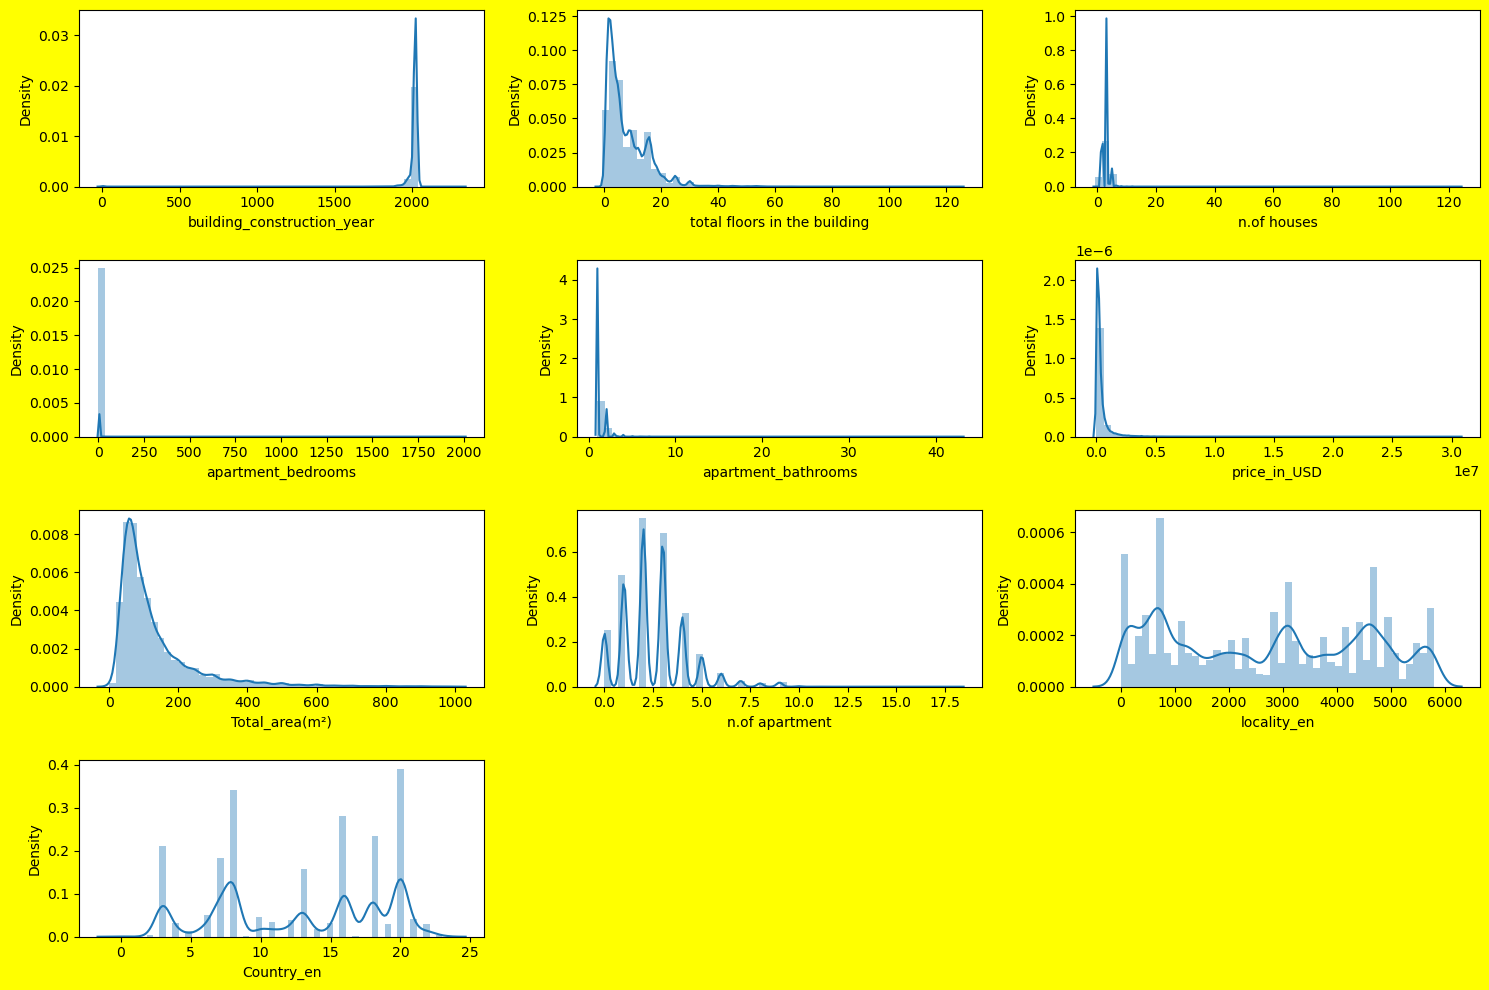

In [ ]:
#using a distribution plot to checking the normal distribution or not.
plt.figure(figsize=(15,10), facecolor='yellow')
plotnumber = 1

for column in df:
    if plotnumber<=10 :
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.tight_layout()
plt.show()

In [4]:
df.skew()

building_construction_year      -18.153210
total floors in the building      2.214984
n.of houses                      11.235623
apartment_bedrooms              175.374251
apartment_bathrooms               9.376515
price_in_USD                      9.860563
Total_area(m²)                    2.694473
n.of apartment                    1.008114
locality_en                       0.079217
Country_en                       -0.200918
dtype: float64

In [33]:
X = df.drop(columns=['price_in_USD'])
y = df['price_in_USD']


In [ ]:
#using powerTransformer[''yeo-johnson'] to decrease the skewness
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson')

X_transformed = pt.fit_transform(X)

X_transformed = pd.DataFrame(
    X_transformed,
    columns=X.columns,
    index=X.index
)


In [35]:
X_transformed.skew().sort_values()


building_construction_year     -0.568529
locality_en                    -0.311007
apartment_bedrooms             -0.253411
Country_en                     -0.233701
Total_area(m²)                 -0.013547
n.of houses                     0.000441
n.of apartment                  0.002179
total floors in the building    0.025909
apartment_bathrooms             1.248045
dtype: float64

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import numpy as np


In [37]:
X_train, X_test, y_train, y_test = train_test_split(
    X_transformed, y, test_size=0.2, random_state=42
)


In [ ]:
#using minmaxScaler for data normalization
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
#using KNeighborsRegressor and Metrics
%%time

from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics

knn = KNeighborsRegressor()
knn.fit(X_train_scaled, y_train)

y_test_pred = knn.predict(X_test_scaled)

print("Model's MAE :", metrics.mean_absolute_error(y_test, y_test_pred))
print("Model's MSE :", metrics.mean_squared_error(y_test, y_test_pred))
print("Model's RMSE :", np.sqrt(metrics.mean_absolute_error(y_test, y_test_pred)))
print("Model's R2 score :", metrics.r2_score(y_test, y_test_pred))
print()


Model's MAE : 182983.33477621348
Model's MSE : 307216644811.6938
Model's RMSE : 427.76551377619666
Model's R2 score : 0.5415153223507795

CPU times: total: 5.3 s
Wall time: 5.34 s


In [113]:
print("Training Score: ", knn.score(X_train_scaled,y_train))
print("Test Score: ",knn.score(X_test_scaled,y_test))

Training Score:  0.6938288388373799
Test Score:  0.5415153223507795


# after using KNeighborsRegressor,we got the accuracy of trianing and testing score
# Training Score:  0.6938288388373799
# Test Score:  0.5415153223507795


In [60]:
model = RandomForestRegressor(
    n_estimators=69,
    max_depth=8,
    min_samples_split=15,
    random_state=42,
    n_jobs=-1
)

model.fit(X_train_scaled, y_train)


RandomForestRegressor(max_depth=8, min_samples_split=15, n_estimators=69,
                      n_jobs=-1, random_state=42)

In [61]:
y_pred = model.predict(X_test_scaled)

In [62]:
print("MAE  :", metrics.mean_absolute_error(y_test, y_pred))
print("MSE  :", metrics.mean_squared_error(y_test, y_pred))
print("RMSE :", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2   :", metrics.r2_score(y_test, y_pred))


MAE  : 199292.03818264947
MSE  : 288202704449.9199
RMSE : 536845.1401008674
R2   : 0.5698913900698732


In [63]:
model.score(X_train_scaled,y_train)

0.639234171293521

# after using RandomForestRegresso,we got the accuracy of trianing and testing score
# Training Score: 0.639234171293521
# Test Score:0.5698913900698732

In [64]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(
    n_estimators=30,
    learning_rate=0.03,
    max_depth=8,
    subsample=0.8,         
    random_state=42)
gbr.fit(X_train_scaled, y_train)

y_test_pred = gbr.predict(X_test_scaled)

print("MAE  :", metrics.mean_absolute_error(y_test, y_pred))
print("MSE  :", metrics.mean_squared_error(y_test, y_pred))
print("RMSE :", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2   :", metrics.r2_score(y_test, y_pred))

MAE  : 199292.03818264947
MSE  : 288202704449.9199
RMSE : 536845.1401008674
R2   : 0.5698913900698732


In [65]:
gbr.score(X_train_scaled,y_train)

0.5792549502166116

# after using GradientBoostingRegressor,we got the accuracy of trianing and testing score
# Training Score: 0.5792549502166116
# Test Score: 0.5698913900698732

In [157]:
!pip install xgboost


Defaulting to user installation because normal site-packages is not writeable


In [107]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(
    n_estimators=230,
    learning_rate=0.04,
    max_depth=5,
    subsample=0.85,
    colsample_bytree=0.8,
    objective='reg:squarederror',
    random_state=42,
    n_jobs=-1
)

xgb_model.fit(X_train_scaled, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.04, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=230,
             n_jobs=-1, num_parallel_tree=None, ...)

In [108]:
y_pred = xgb_model.predict(X_test_scaled)


In [109]:
print("MAE  :", metrics.mean_absolute_error(y_test, y_pred))
print("MSE  :", metrics.mean_squared_error(y_test, y_pred))
print("RMSE :", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2   :", metrics.r2_score(y_test, y_pred))


MAE  : 185583.55454327253
MSE  : 243172347894.12833
RMSE : 493125.0834160926
R2   : 0.6370938963747195


In [110]:
xgb_model.score(X_train_scaled,y_train)

0.7106570574365217

# after using XGBRegressor,we got the accuracy of trianing and testing score
# Training Score: 0.7106570574365217
# Test Score:0.6370938963747195

# After uding  'RandomForestRegressor' ,'KNeighborsRegressor' ,'GradientBoostingRegressor' ,and 'XGBRegressor'
# we got the better prediction percentage in GradientBoostingRegressor and XGBRegressor
# but XGBRegressor gives the better accuracy than GradientBoostingRegressor